# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import numpy as np

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\graci_qcplqsz\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# Load .env enviroment variables
load_dotenv()

# Set News API Key
from newsapi.newsapi_client import NewsApiClient
api_key = os.getenv("news_api")

Python-dotenv could not parse statement starting at line 12
Python-dotenv could not parse statement starting at line 15


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key = api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin', language='en', sort_by='relevancy')

In [5]:
# Check BTC articles keys
btc_articles.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [6]:
# Check BTC articles sample
btc_articles['articles'][0]

{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'https://www.engadget.com/about/editors/saqib-shah',
 'title': 'El Salvador becomes the first country to approve Bitcoin as legal currency',
 'description': 'El Salvador has voted to adopt Bitcoin as legal tender..',
 'url': 'https://www.engadget.com/el-salvador-bitcoin-legal-tender-120440725.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-06/84c12d30-c919-11eb-a6ff-cedcc0c31aae',
 'publishedAt': '2021-06-09T12:04:40Z',
 'content': "El Salvador's President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country's congress voted to accept the cryptocurrency by a majori… [+1414 chars]"}

In [7]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum', language='en', sort_by='relevancy')

In [8]:
# Check ETH articles sample
eth_articles['articles'][0]

{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Joseph Green',
 'title': 'This blockchain development course bundle is on sale for 97% off',
 'description': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\n\nIs everyone you know investing in cryptocurrency? The Cryptocurrency with Ethereum and Solidity Blockchain Dev…',
 'url': 'https://mashable.com/uk/shopping/june-17-cryptocurrency-ethereum-and-solidity-blockchain-developer-bundle/',
 'urlToImage': 'https://mondrian.mashable.com/2021%252F06%252F17%252Fa4%252Fd95c8d39ee014266beea8c6b9d053d19.1c765.jpg%252F1200x630.jpg?signature=13rMcdTv3FsupfDx5m8coAhsN-4=',
 'publishedAt': '2021-06-17T04:05:00Z',
 'content': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\r\nIs everyone you know investing in cryptocurrency? … [+949 chars

In [9]:
# Create the Bitcoin sentiment scores DataFrame
# Create dataframe of content
btc_df = pd.DataFrame(btc_articles['articles'])[['content']]
btc_df.head()

,content
0,El Salvador's President Nayib Bukele has made ...
1,El Salvador has become the first country in th...
2,"It's all about clean energy, it seems. \r\nElo..."
3,image captionThe move means bitcoin will be ac...
4,"Several crypto fans that descended on Miami, F..."


In [10]:
btc_df.shape

(20, 1)

In [11]:
# Setup Vader Sentiment Model
analyzer = SentimentIntensityAnalyzer()
# create new column in BTC df to capture text sentiment scores
btc_df['sentiment_neg'] = np.nan
btc_df['sentiment_neu'] = np.nan
btc_df['sentiment_pos'] = np.nan
btc_df['sentiment_compound'] = np.nan

# loop over df and fill the sentiment columns with the scores for each article
for idx, row in btc_df.iterrows():
    btc_df.loc[idx,'sentiment_neg'] = analyzer.polarity_scores(row['content'])['neg']
for idx, row in btc_df.iterrows():
    btc_df.loc[idx,'sentiment_neu'] = analyzer.polarity_scores(row['content'])['neu']
for idx, row in btc_df.iterrows():
    btc_df.loc[idx,'sentiment_pos'] = analyzer.polarity_scores(row['content'])['pos']
for idx, row in btc_df.iterrows():
    btc_df.loc[idx,'sentiment_compound'] = analyzer.polarity_scores(row['content'])['compound']


In [12]:
# check amended BTC df
btc_df

,content,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,El Salvador's President Nayib Bukele has made ...,0.000,0.718,0.282,0.8402
1,El Salvador has become the first country in th...,0.000,0.957,0.043,0.1280
2,"It's all about clean energy, it seems. \r\nElo...",0.000,0.831,0.169,0.6908
3,image captionThe move means bitcoin will be ac...,0.000,0.940,0.060,0.2732
4,"Several crypto fans that descended on Miami, F...",0.000,0.893,0.107,0.5574
5,"Hello friends, and welcome back to Week in Rev...",0.000,0.846,0.154,0.7500
6,"By Mary-Ann RussonBusiness reporter, BBC News\...",0.000,0.930,0.070,0.3400
7,"SAN SALVADOR, June 16 (Reuters) - El Salvador ...",0.000,0.957,0.043,0.1280
8,"LONDON, June 23 (Reuters) - El Salvador is det...",0.058,0.833,0.108,0.2023
9,"LONDON, June 23 (Reuters) - El Salvador is det...",0.057,0.838,0.105,0.2023


In [13]:
# get descriptive analytics on BTC df
btc_summary = btc_df.describe()
btc_summary

,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
count,20.000000,20.000000,20.000000,20.000000
mean,0.020400,0.902200,0.077350,0.211855
std,0.032425,0.072576,0.071029,0.329191
min,0.000000,0.718000,0.000000,-0.381800
25%,0.000000,0.844750,0.032250,0.000000
50%,0.000000,0.922000,0.065500,0.165150
75%,0.057250,0.955500,0.107250,0.369700
max,0.083000,1.000000,0.282000,0.840200


In [14]:
# Which coin had the highest mean positive score?
btc_high_mean_pos = btc_df['sentiment_pos'].describe(include='all').loc['mean']
# Which coin had the highest negative score?
btc_high_neg = btc_df['sentiment_neg'].describe(include='all').loc['max']
# Which coin had the highest positive score?
btc_high_pos = btc_df['sentiment_pos'].describe(include='all').loc['max']
# Which coin had the highest compound score?
btc_high_compound = btc_df['sentiment_compound'].describe(include='all').loc['mean']

print(f"For Bitcoin articles:")
print(f"The Bitcoin articles mean compound score was: {btc_high_compound:0.3f}")
print(f"The Bitcoin articles mean positive score was: {btc_high_mean_pos:0.3f}")
print(f"The Bitcoin articles highest negative score was: {btc_high_neg}")
print(f"The Bitcoin articles highest positive score was: {btc_high_pos}")

For Bitcoin articles:
The Bitcoin articles mean compound score was: 0.212
The Bitcoin articles mean positive score was: 0.077
The Bitcoin articles highest negative score was: 0.083
The Bitcoin articles highest positive score was: 0.282


### for Ethereum

In [15]:
# Create the Ethereum sentiment scores DataFrame
# Create dataframe of content
eth_df = pd.DataFrame(eth_articles['articles'])[['content']]
eth_df.head()

,content
0,TL;DR: The Cryptocurrency with Ethereum and So...
1,It wasn't long ago that your average person ha...
2,A representation of virtual currency Ethereum ...
3,This article was translated from our Spanish e...
4,This new mining feature is called 'Norton Cryp...


In [16]:
# create new column in ETH df to capture text sentiment scores
eth_df['sentiment_neg'] = np.nan
eth_df['sentiment_neu'] = np.nan
eth_df['sentiment_pos'] = np.nan
eth_df['sentiment_compound'] = np.nan

# loop over df and fill the sentiment columns with the scores for each article
for idx, row in eth_df.iterrows():
    eth_df.loc[idx,'sentiment_neg'] = analyzer.polarity_scores(row['content'])['neg']
for idx, row in eth_df.iterrows():
    eth_df.loc[idx,'sentiment_neu'] = analyzer.polarity_scores(row['content'])['neu']
for idx, row in eth_df.iterrows():
    eth_df.loc[idx,'sentiment_pos'] = analyzer.polarity_scores(row['content'])['pos']
for idx, row in eth_df.iterrows():
    eth_df.loc[idx,'sentiment_compound'] = analyzer.polarity_scores(row['content'])['compound']


In [17]:
# check amended ETH df
eth_df

,content,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,TL;DR: The Cryptocurrency with Ethereum and So...,0.000,1.000,0.000,0.0000
1,It wasn't long ago that your average person ha...,0.061,0.939,0.000,-0.2960
2,A representation of virtual currency Ethereum ...,0.000,1.000,0.000,0.0000
3,This article was translated from our Spanish e...,0.066,0.934,0.000,-0.3400
4,This new mining feature is called 'Norton Cryp...,0.000,1.000,0.000,0.0000
5,Opinions expressed by Entrepreneur contributor...,0.000,0.949,0.051,0.1280
6,CryptoPunks represent the only historically re...,0.151,0.782,0.067,-0.4588
7,"Sir Tim Berners-Lee, credited as the inventor ...",0.000,0.935,0.065,0.3612
8,"Two Ethereum-based protocols, Keep Network and...",0.000,1.000,0.000,0.0000
9,You’ve likely seen the headlines surrounding t...,0.000,0.914,0.086,0.4939


In [18]:
# get descriptive analytics on ETH df
eth_summary = eth_df.describe()
eth_summary

,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
count,20.000000,20.000000,20.00000,20.000000
mean,0.027650,0.949150,0.02320,-0.029330
std,0.042773,0.051409,0.03315,0.278893
min,0.000000,0.782000,0.00000,-0.458800
25%,0.000000,0.929250,0.00000,-0.278900
50%,0.000000,0.939500,0.00000,0.000000
75%,0.061250,1.000000,0.05525,0.140475
max,0.151000,1.000000,0.08600,0.493900


In [19]:
# Which coin had the highest mean positive score?
eth_high_mean_pos = eth_df['sentiment_pos'].describe(include='all').loc['mean']
# Which coin had the highest negative score?
eth_high_neg = eth_df['sentiment_neg'].describe(include='all').loc['max']
# Which coin had the highest positive score?
eth_high_pos = eth_df['sentiment_pos'].describe(include='all').loc['max']
# Which coin had the highest compound score?
eth_high_compound = eth_df['sentiment_compound'].describe(include='all').loc['mean']

print(f"For Ethereum articles:")
print(f"The Ethereum articles mean compound score was: {eth_high_compound:0.3f}")
print(f"The Ethereum articles mean positive score was: {eth_high_mean_pos:0.3f}")
print(f"The Ethereum articles highest negative score was: {eth_high_neg}")
print(f"The Ethereum articles highest positive score was: {eth_high_pos}")

For Ethereum articles:
The Ethereum articles mean compound score was: -0.029
The Ethereum articles mean positive score was: 0.023
The Ethereum articles highest negative score was: 0.151
The Ethereum articles highest positive score was: 0.086


## Describe the Bitcoin Sentiment
### The Bitcoin sentiment is overall positive, with a mean compound sentiment score of 0.21 which is considered positive (> 0.05).

## Describe the Ethereum Sentiment
### Ethereum however, has an overall negative sentiment score, due to a mean compound sentiment score of -0.029 which is considered negative (< 0.05).

### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score of 0.07 (vs Ethereum at 0.02).

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score at 0.21 (vs Ethereum at -0.029)

Q: Which coin had the highest negative score?

A: Ethereum had the highest negative score at 0.15 (vs Bitcoin at 0.08)

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score at 0.28 (vs Ethereum at 0.086)

Overall, Bitcoin's sentiment score has higher than Ethereum's on all the measures.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [20]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [21]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = (stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [22]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    # Remove the stop words
    sw = (stopwords.words('english'))
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub("",text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem_words = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem_words if word.lower() not in sw]
        
    return tokens

In [23]:
# Create tokens for Bitcoin
# Not doing in dataframe per discussion with Liam, as it is breaking (complaining df is multi-index when it's not).  
# Doing as a big string instead.

btc_string = btc_df['content'].to_string()
btc_tokens = tokenizer(btc_string)

# show tokenized btc article content
print(btc_tokens)


['el', 'salvadors', 'president', 'nayib', 'bukele', 'ha', 'made', 'el', 'salvador', 'ha', 'become', 'first', 'country', 'th', 'clean', 'energy', 'seemsrnelo', 'image', 'captionthe', 'move', 'mean', 'bitcoin', 'ac', 'several', 'crypto', 'fan', 'descended', 'miami', 'f', 'hello', 'friend', 'welcome', 'back', 'week', 'rev', 'maryann', 'russonbusiness', 'reporter', 'bbc', 'news', 'san', 'salvador', 'june', 'reuters', 'el', 'salvador', 'london', 'june', 'reuters', 'el', 'salvador', 'det', 'london', 'june', 'reuters', 'el', 'salvador', 'det', 'representations', 'virtual', 'currency', 'bitcoi', 'reuters', 'staffrnsan', 'salvador', 'reuters', 'e', 'colonial', 'pipeline', 'biggest', 'rece', 'hello', 'welcome', 'back', 'toequity', 'techcrunchs', 'story', 'originally', 'appeared', 'marketbeatwh', 'bitcoin', 'surged', 'wednesday', 'reuters', 'staffrnfile', 'photo', 'representation', 'bitcoin', 'dropped', 'gmt', 'representation', 'virtual', 'cryptocurrency', 'posted', 'rnbitcoin', 'tumbled', 'monda

In [24]:
# Create tokens for Ethereum
# Not doing in dataframe per discussion with Liam, as it is breaking (complaining df is multi-index when it's not).  
# Doing as a big string instead.

eth_string = eth_df['content'].to_string()
eth_tokens = tokenizer(eth_string)

# show tokenized eth article content
print(eth_tokens)


['tldr', 'cryptocurrency', 'ethereum', 'wasnt', 'long', 'ago', 'average', 'person', 'ha', 'representation', 'virtual', 'currency', 'ethereum', 'article', 'wa', 'translated', 'spanish', 'e', 'new', 'mining', 'feature', 'called', 'norton', 'cryp', 'opinions', 'expressed', 'entrepreneur', 'contributor', 'cryptopunks', 'represent', 'historically', 'sir', 'tim', 'bernerslee', 'credited', 'inventor', 'two', 'ethereumbased', 'protocol', 'keep', 'network', 'youve', 'likely', 'seen', 'headline', 'surrounding', 'ambition', 'crypto', 'investor', 'yao', 'qian', 'former', 'head', 'chinas', 'digital', 'consumer', 'us', 'digital', 'yuan', 'red', 'envelope', 'bitcoin', 'surged', 'wednesday', 'bitcoin', 'dropped', 'gmt', 'tldr', 'cryptocurrency', 'ethereum', 'sol', 'ina', 'fassbenderafp', 'via', 'getty', 'imagesrninvesto', 'bitcoin', 'surged', 'g', 'reuters', 'staffrnjune', 'reuters', 'bitcoi', 'reuters', 'staffrnjune', 'reuters', 'bitcoi']


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [25]:
from collections import Counter
from nltk import ngrams

In [26]:
# Generate the Bitcoin N-grams where N=2
Counter(ngrams(btc_tokens, n=2)).most_common(10)


[(('el', 'salvador'), 4),
 (('june', 'reuters'), 3),
 (('reuters', 'el'), 3),
 (('welcome', 'back'), 2),
 (('london', 'june'), 2),
 (('salvador', 'det'), 2),
 (('el', 'salvadors'), 1),
 (('salvadors', 'president'), 1),
 (('president', 'nayib'), 1),
 (('nayib', 'bukele'), 1)]

In [27]:
# Generate the Ethereum N-grams where N=2
Counter(ngrams(eth_tokens, n=2)).most_common(10)


[(('tldr', 'cryptocurrency'), 2),
 (('cryptocurrency', 'ethereum'), 2),
 (('bitcoin', 'surged'), 2),
 (('reuters', 'staffrnjune'), 2),
 (('staffrnjune', 'reuters'), 2),
 (('reuters', 'bitcoi'), 2),
 (('ethereum', 'wasnt'), 1),
 (('wasnt', 'long'), 1),
 (('long', 'ago'), 1),
 (('ago', 'average'), 1)]

In [28]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [29]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens, N=3)

[('salvador', 6), ('reuters', 6), ('el', 5)]

In [30]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens, N=3)

[('reuters', 4), ('ethereum', 3), ('bitcoin', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

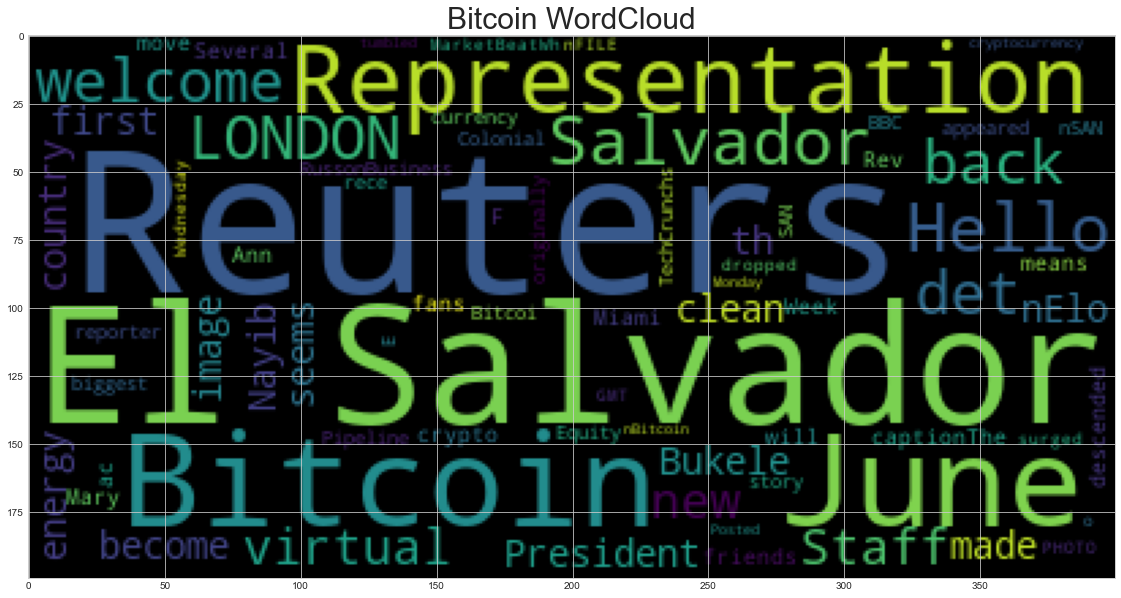

In [51]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(btc_string)
plt.title('Bitcoin WordCloud', size=30)
plt.imshow(wc)

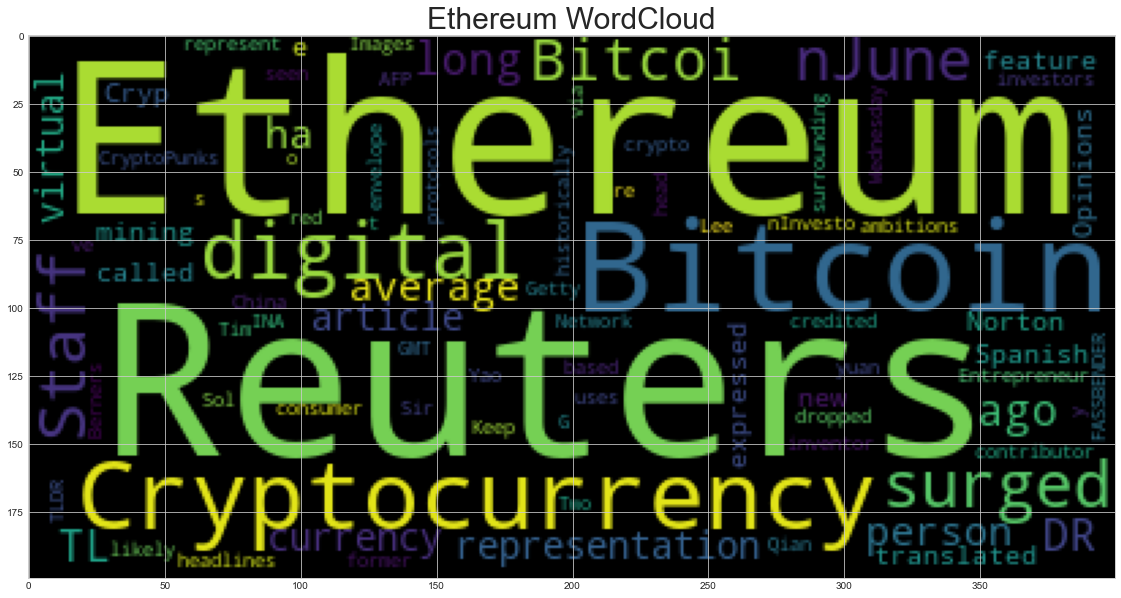

In [52]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(eth_string)
plt.title('Ethereum WordCloud', size=30)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [34]:
import spacy
from spacy import displacy

In [35]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm


In [36]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [37]:
# Concatenate all of the Bitcoin text together (done earlier)
btc_string

"0     El Salvador's President Nayib Bukele has made ...\n1     El Salvador has become the first country in th...\n2     It's all about clean energy, it seems.\xa0\\r\\nElo...\n3     image captionThe move means bitcoin will be ac...\n4     Several crypto fans that descended on Miami, F...\n5     Hello friends, and welcome back to Week in Rev...\n6     By Mary-Ann RussonBusiness reporter, BBC News\\...\n7     SAN SALVADOR, June 16 (Reuters) - El Salvador ...\n8     LONDON, June 23 (Reuters) - El Salvador is det...\n9     LONDON, June 23 (Reuters) - El Salvador is det...\n10    Representations of the virtual currency Bitcoi...\n11    By Reuters Staff\\r\\nSAN SALVADOR (Reuters) - E...\n12    Other than Colonial Pipeline, the biggest rece...\n13    Hello and welcome back to\xa0Equity, TechCrunchs ...\n14    This story originally appeared on MarketBeatWh...\n15    Bitcoin surged 8.54 % to $36,265 on Wednesday,...\n16    By Reuters Staff\\r\\nFILE PHOTO: Representation...\n17    Bitcoin dro

In [38]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_string)


In [39]:
# Visualise the NER entities
displacy.render(btc_doc, style='ent')

In [40]:

# Visualise NER using word cloud, and add title to the document
btc_entities=[ent.text for ent in btc_doc.ents if ent.label_ in ['GPE', 'ORG']]
btc_entities = [i.lower().replace(' ','_') for i in btc_entities]

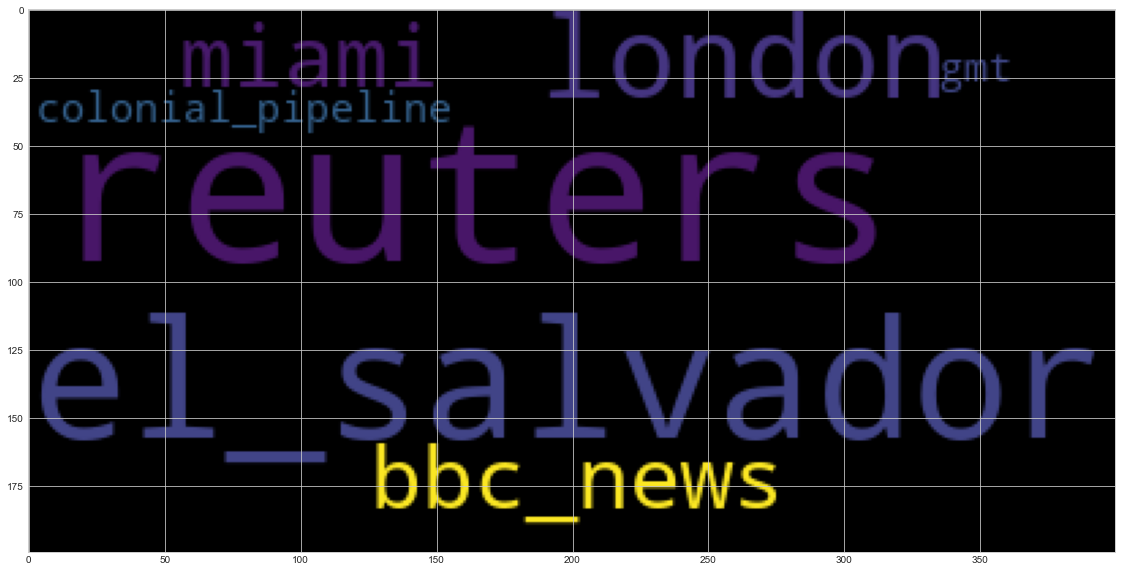

In [41]:
# Render the visualization
wc = WordCloud().generate(' '.join(btc_entities))
plt.imshow(wc)


In [42]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text,ent.label_)


El Salvador's GPE
Nayib Bukele PERSON
El Salvador GPE
first ORDINAL
Miami GPE
Mary-Ann RussonBusiness PERSON
BBC News\ ORG
June 16 DATE
Reuters ORG
El Salvador GPE
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
Bitcoi PERSON
Reuters ORG
Reuters ORG
Colonial Pipeline ORG
15 CARDINAL
Bitcoin PERSON
8.54 % PERCENT
36,265 MONEY
Wednesday DATE
Reuters ORG
17 CARDINAL
Bitcoin PERSON
5.71% PERCENT
35,210 MONEY
0600 CARDINAL
GMT ORG
Monday DATE


---

### Ethereum NER

In [43]:
# Concatenate all of the Ethereum text together (done earlier)
eth_string

"0     TL;DR: The Cryptocurrency with Ethereum and So...\n1     It wasn't long ago that your average person ha...\n2     A representation of virtual currency Ethereum ...\n3     This article was translated from our Spanish e...\n4     This new mining feature is called 'Norton Cryp...\n5     Opinions expressed by Entrepreneur contributor...\n6     CryptoPunks represent the only historically re...\n7     Sir Tim Berners-Lee, credited as the inventor ...\n8     Two Ethereum-based protocols, Keep Network and...\n9     You’ve likely seen the headlines surrounding t...\n10    While the ambitions of crypto investors have s...\n11    Yao Qian, the former head of China's digital y...\n12    A consumer uses a digital yuan red envelope in...\n13    Bitcoin surged 8.54 % to $36,265 on Wednesday,...\n14    Bitcoin dropped 5.71% to $35,210 at 0600 GMT o...\n15    TLDR: The Cryptocurrency with Ethereum and Sol...\n16    INA FASSBENDER/AFP via Getty Images\\r\\nInvesto...\n17    Bitcoin surged 9.83 % 

In [44]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_string)

# Visualise the NER entities
displacy.render(btc_doc, style='ent')

In [45]:
# Add a title to the document
# Visualise NER using word cloud, and add title to the document
eth_entities=[ent.text for ent in eth_doc.ents if ent.label_ in ['GPE', 'ORG']]
eth_entities = [i.lower().replace(' ','_') for i in eth_entities]

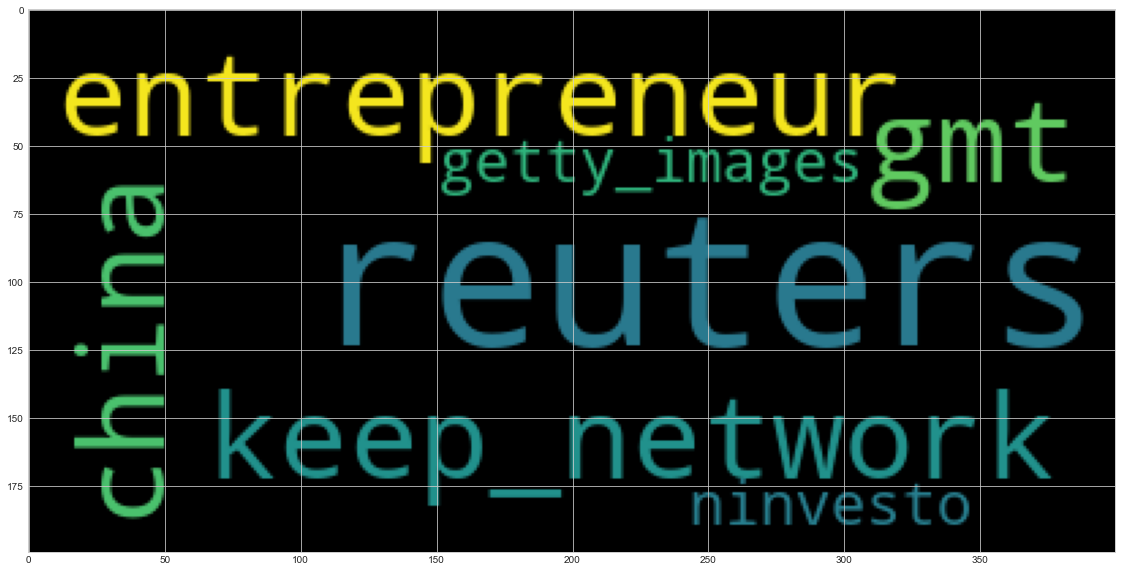

In [46]:
# Render the visualization
wc = WordCloud().generate(' '.join(eth_entities))
plt.imshow(wc)

In [47]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text,ent.label_)

Spanish LANGUAGE
Norton Cryp WORK_OF_ART
Entrepreneur ORG
6 CARDINAL
CryptoPunks PRODUCT
Tim Berners-Lee PERSON
Two CARDINAL
Keep Network ORG
Qian PERSON
China GPE
12 CARDINAL
Bitcoin PERSON
8.54 % PERCENT
36,265 MONEY
Wednesday DATE
14 CARDINAL
Bitcoin PERSON
5.71% PERCENT
35,210 MONEY
0600 CARDINAL
GMT ORG
Getty Images\r\nInvesto ORG
17 CARDINAL
Bitcoin PERSON
9.83 % PERCENT
22:05 G TIME
Reuters ORG
25 CARDINAL
Reuters ORG
19 CARDINAL
Reuters ORG
13 CARDINAL
Reuters ORG


---